In [ ]:
import warnings
from math import sqrt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url='drive/MyDrive/tez_datas/inf_adjusted_dataset.csv'
Gold = pd.read_csv(url, header=0, index_col=0)["Dollar Index_Adj"]
print(Gold.shape)

(3028,)


In [ ]:
data_prediction_days=Gold.tail(365)
data_train_days=Gold[0:len(Gold)-365]

In [ ]:
predicitons=list()
best_predictions=list()
from sklearn.metrics import mean_squared_error
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.7)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    #for t in range(len(test)): 
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test))[0]
      #predictions.append(yhat)
      #history.append(test[t])
        
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse,model_fit,test
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg, best_aic = float("inf"), None, float("inf")
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse, model_fit,test = evaluate_arima_model(dataset, order)
                    normalized_rmse=rmse/(max(test)-min(test))
                    aic=model_fit.aic
                  
                    if normalized_rmse < best_score and aic < best_aic:
                        best_score, best_cfg,best_aic = normalized_rmse, order, aic
                        model_fit.save('model.pkl')
                    print('ARIMA%s norm_RMSE=%f AIC=%f' % (order,normalized_rmse,aic))
                except:
                    continue
    print('Best ARIMA%s norm_RMSE=%f AIC=%f' % (best_cfg, best_score,best_aic))

In [ ]:
# evaluate parameters
p_values = [0,1,2,3]
d_values = [0,1,2,3]
q_values = [0,1,2,3]
warnings.filterwarnings("ignore")
evaluate_models(data_train_days[:p], p_values, d_values, q_values)

ARIMA(0, 0, 0) norm_RMSE=0.558746 AIC=11019.141551
ARIMA(0, 0, 1) norm_RMSE=0.558681 AIC=8767.078786
ARIMA(0, 0, 2) norm_RMSE=0.558600 AIC=7112.482591
ARIMA(0, 0, 3) norm_RMSE=0.558526 AIC=6104.107859
ARIMA(0, 1, 0) norm_RMSE=0.657308 AIC=2935.463436
ARIMA(0, 1, 1) norm_RMSE=0.657061 AIC=2936.980397
ARIMA(0, 1, 2) norm_RMSE=0.657065 AIC=2938.980250
ARIMA(0, 1, 3) norm_RMSE=0.656740 AIC=2940.512012
ARIMA(0, 2, 0) norm_RMSE=2.443267 AIC=4254.269641
ARIMA(0, 2, 1) norm_RMSE=0.389821 AIC=2944.079514
ARIMA(0, 2, 2) norm_RMSE=0.389926 AIC=2945.618097
ARIMA(0, 2, 3) norm_RMSE=0.388860 AIC=2947.618020
ARIMA(1, 0, 0) norm_RMSE=0.541438 AIC=2937.857438
ARIMA(1, 0, 1) norm_RMSE=0.541188 AIC=2939.548524
ARIMA(1, 0, 2) norm_RMSE=0.541245 AIC=2941.527564
ARIMA(1, 0, 3) norm_RMSE=0.541018 AIC=2943.207467
ARIMA(1, 1, 0) norm_RMSE=0.657064 AIC=2936.979984
ARIMA(1, 1, 1) norm_RMSE=0.657046 AIC=2938.980446
ARIMA(1, 1, 2) norm_RMSE=0.657046 AIC=2940.978554
ARIMA(1, 1, 3) norm_RMSE=0.656655 AIC=2937.446391

In [ ]:
train_size = int(len(data_train_days.values) * 0.7)
train, test = data_train_days[0:train_size], data_train_days[train_size:]
history = [x for x in train]
# make predictions
predictions = list()
model = ARIMA(history, order=(1,1,1))
model_fit = model.fit()


In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 1862
Model:                 ARIMA(0, 2, 3)   Log Likelihood               -7859.317
Method:                       css-mle   S.D. of innovations             16.444
Date:                Sun, 28 Aug 2022   AIC                          15728.634
Time:                        19:26:21   BIC                          15756.281
Sample:                             2   HQIC                         15738.822
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.695      0.487      -0.002       0.001
ma.L1.D2.y    -1.0047      0.023    -42.910      0.000      -1.051      -0.959
ma.L2.D2.y     0.0243      0.031      0.772      0.4

In [ ]:
from statsmodels.tsa.arima_model import ARIMAResults
import pickle
with open('model.pkl','rb') as f:
    loaded = pickle.load(f)
    print(loaded.summary())
    

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 1862
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1469.040
Method:                       css-mle   S.D. of innovations              0.532
Date:                Wed, 31 Aug 2022   AIC                           2944.080
Time:                        10:20:33   BIC                           2960.668
Sample:                             2   HQIC                          2950.192
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.337e-05   2.29e-05      0.584      0.559   -3.15e-05    5.83e-05
ma.L1.D2.y    -1.0000      0.001   -694.950      0.000      -1.003      -0.997
                                    Roots           

In [ ]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_prediction =loaded.forecast(799+365)[0]
#print(test_prediction)
rmse = sqrt(mean_squared_error(data_prediction_days , test_prediction[-365:]))
normalized_rmse=rmse/(max(data_prediction_days)-min(data_prediction_days))
r2=r2_score(data_prediction_days , test_prediction[-365:])
mae=mean_absolute_error(data_prediction_days,test_prediction[-365:])
print("norm_RMSE= ", normalized_rmse, "r2_score= ",r2 , "mae :  ", mae)



norm_RMSE=  0.14128969571438493 r2_score=  0.7100449990098274 mae :   1.0808159702987512


In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


rolling_average_365=moving_average(Gold.values,365)
rolling_average_30=moving_average(Gold.values,30)

In [ ]:
df= np.arange(799)
print(df)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
z = np.polyfit(df,Gold.values,1)
p = np.poly1d(z)

In [ ]:
len(data_train_days.values)*0.3

798.9

In [ ]:
valid_prediction =loaded.forecast((799+365))[0]

In [ ]:
from statsmodels.tsa.seasonal import STL
res = STL(Gold,period=188).fit()


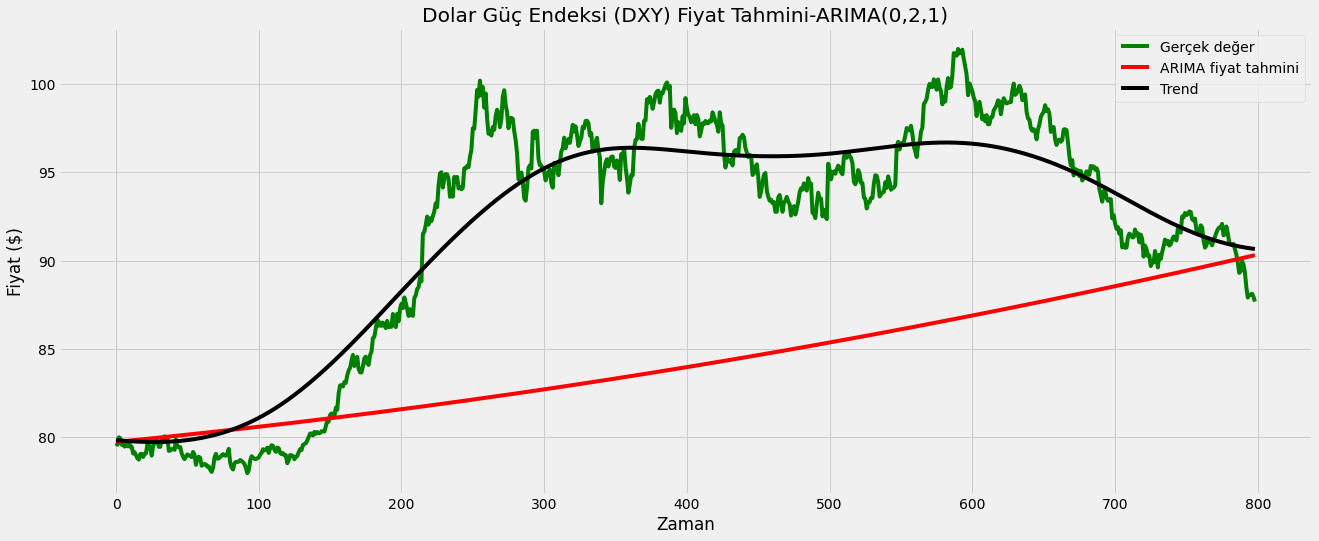

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.plot(Gold.values[-(365+799):-365],color = 'green',label = 'Gerçek değer')
plt.plot(test_prediction[-(365+799):-365],color = 'red',label = 'ARIMA fiyat tahmini')
plt.plot(df,res.trend[-(365+799):-365],color ='black',label='Trend')
#plt.plot(rolling_average_30,color ='red',label='30 günlük MA')

#plt.title('Dolar Güç Endeksi (DXY) Kapanış-trend ve 30 günlük hareketli ortalama ilişkisi')

plt.title('Dolar Güç Endeksi (DXY) Fiyat Tahmini-ARIMA%s' % "(0,2,1)")
plt.xlabel('Zaman')
plt.ylabel('Fiyat ($)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
rmse = sqrt(mean_squared_error(Gold.values[-2999:] ,rolling_average_30 ))
normalized_rmse=rmse/(max(Gold.values[-2999:])-min(Gold.values[-2999:]))
print(normalized_rmse)

0.027514335256288158


# trend -arıma test 


In [ ]:
rmse = sqrt(mean_squared_error(res.trend[-365:] , valid_prediction[-365:]))
normalized_rmse=rmse/(max(res.trend[-365:])-min(res.trend[-365:]))
r2=r2_score(res.trend[-365:] , valid_prediction[-365:])
mae=mean_absolute_error(res.trend[-365:],valid_prediction[-365:])
print("norm_RMSE= ", normalized_rmse, "r2_score= ",r2,"mae: ", mae)

norm_RMSE=  1.3086542047240008 r2_score=  -16.645154556689633 mae:  288.1849797120508


In [ ]:
predicted_price=np.squeeze(test_prediction)
real_stock_price=np.squeeze(data_prediction_days.values)
df=pd.DataFrame({
    "pred":predicted_price,
    "real":real_stock_price,
    

})
df["% diff"]=(abs(df["pred"]-df["real"])/df["real"])*100
print(df["% diff"].mean())

13.94451301086936


In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2],5) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 5)
SARIMAX: (0, 0, 1) x (0, 0, 2, 5)
SARIMAX: (0, 0, 2) x (0, 1, 0, 5)
SARIMAX: (0, 0, 2) x (0, 1, 1, 5)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
best=None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_train_days,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}5 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 5)5 - AIC:45079.0993254428
ARIMA(0, 0, 0)x(0, 0, 1, 5)5 - AIC:41412.70404914742
ARIMA(0, 0, 0)x(0, 0, 2, 5)5 - AIC:38292.57314028553
ARIMA(0, 0, 0)x(0, 1, 0, 5)5 - AIC:26306.631286552536
ARIMA(0, 0, 0)x(0, 1, 1, 5)5 - AIC:26264.077347121158
ARIMA(0, 0, 0)x(0, 1, 2, 5)5 - AIC:26185.670781390338
ARIMA(0, 0, 0)x(0, 2, 0, 5)5 - AIC:28104.502100197693
ARIMA(0, 0, 0)x(0, 2, 1, 5)5 - AIC:26239.799981346405
ARIMA(0, 0, 0)x(0, 2, 2, 5)5 - AIC:26195.32853344047
ARIMA(0, 0, 0)x(1, 0, 0, 5)5 - AIC:26315.78496350386
ARIMA(0, 0, 0)x(1, 0, 1, 5)5 - AIC:26308.902146736105
ARIMA(0, 0, 0)x(1, 0, 2, 5)5 - AIC:26229.796842375676
ARIMA(0, 0, 0)x(1, 1, 0, 5)5 - AIC:26272.9874770925
ARIMA(0, 0, 0)x(1, 1, 1, 5)5 - AIC:26257.923080671808
ARIMA(0, 0, 0)x(1, 1, 2, 5)5 - AIC:26187.647034349495
ARIMA(0, 0, 0)x(1, 2, 0, 5)5 - AIC:27481.42778656264
ARIMA(0, 0, 0)x(1, 2, 1, 5)5 - AIC:26241.773420987745
ARIMA(0, 0, 0)x(1, 2, 2, 5)5 - AIC:26186.47726532343
ARIMA(0, 0, 0)x(2, 0, 0, 5)5 - AIC:262

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

mod = sm.tsa.arima.ARIMA(data_train_days.values, order=(2,1,2), seasonal_order=(2,1,2,188 ))
res = mod.fit(method='innovations_mle', low_memory=True)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(data_train_days.values,
                                order=(1,1,1),
                                seasonal_order=(1,1,1,100),
                                #freq='D',
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
mod.plot_diagnostics(figsize=(15, 12))
plt.show()

NameError: ignored

In [ ]:
pred = res.forecast(365)


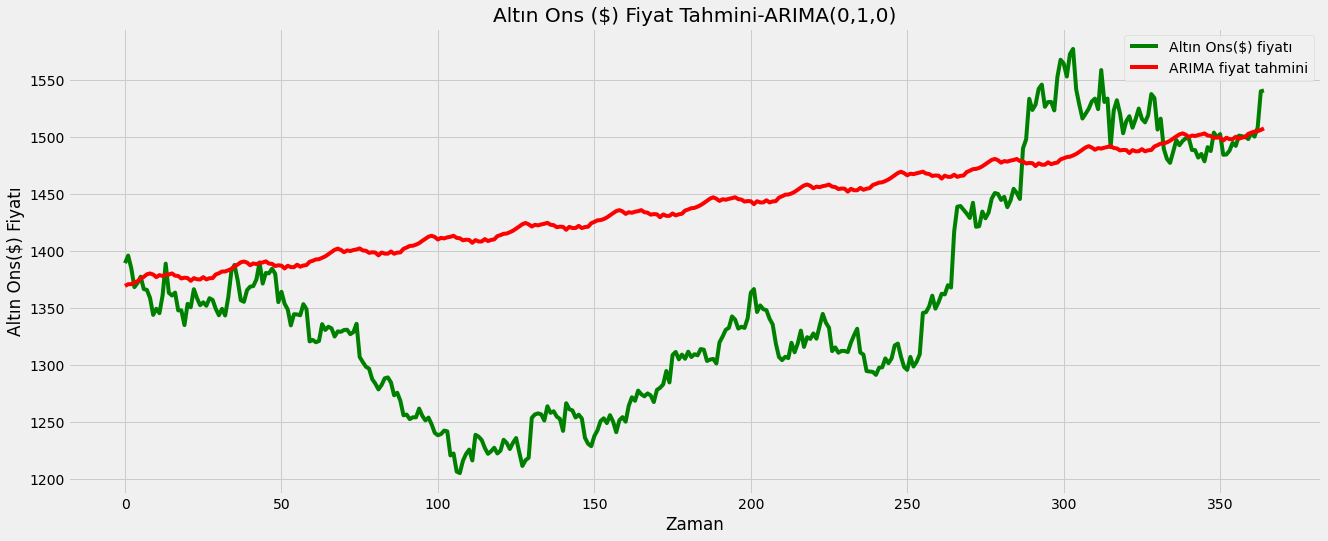

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(data_prediction_days.values,color = 'green', label = 'Altın Ons($) fiyatı')
plt.plot(pred,color = 'red', label = 'ARIMA fiyat tahmini')
plt.title('Altın Ons ($) Fiyat Tahmini-ARIMA%s' % "(0,1,0)")
plt.xlabel('Zaman')
plt.ylabel('Altın Ons($) Fiyatı')
plt.legend()
plt.show()